In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
labels = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
n = len(y)

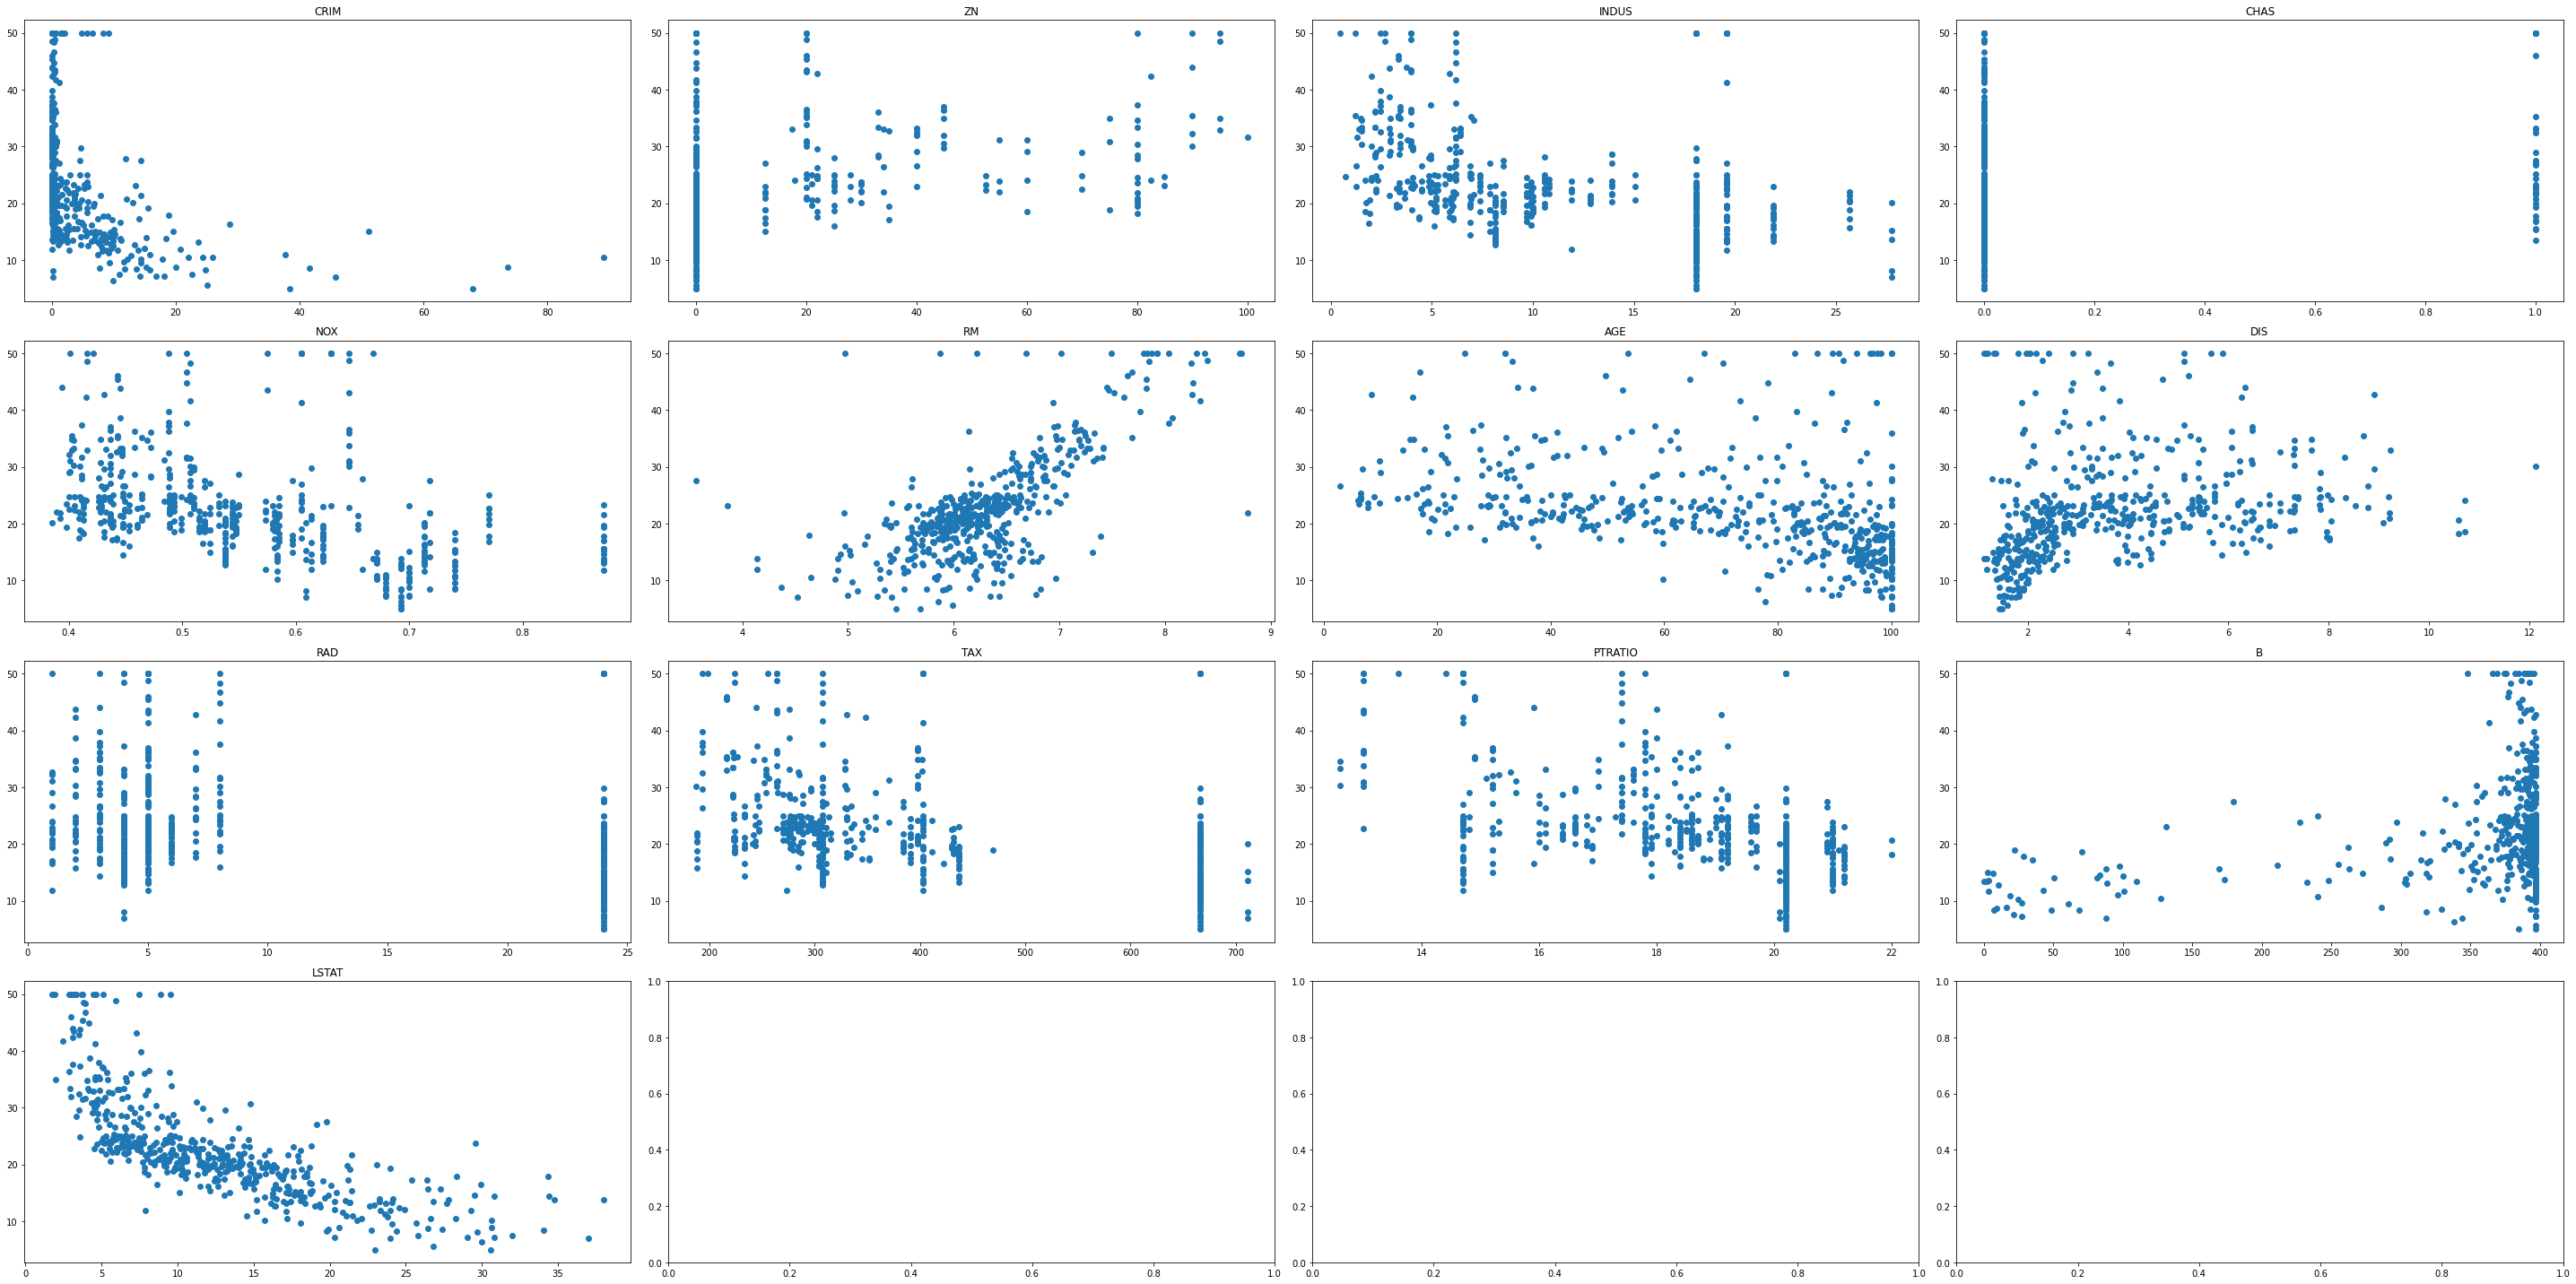

In [3]:
figure, axis = plt.subplots(4, 4)
figure.set_figheight(20)
figure.set_figwidth(40)
for i in range(13):
    sub_fig = axis[(int)(i/4), i%4]
    sub_fig.scatter(x[:, i], y)
    sub_fig.set_title(labels[i])
plt.tight_layout()
plt.savefig('scatter.png')
plt.show()

In [4]:
x0 = x[:, 5] # RM
x1 = x[:, 6] # AGE

In [5]:
lr = 0.000001
epochs = 1000
Losses = []

In [6]:
# y = ax0 + bx1 + c
a, b, c = 0, 0, 0

In [7]:
def Loss(y, y_pred):
    return np.sum((y - y_pred) ** 2) / (2 * n)

In [8]:
for i in range(epochs):
    y_pred = a*x0 + b*x1 + c
    loss = Loss(y, y_pred)
    Losses.append(loss)
    da = np.sum(x0 * (y_pred - y)) / n
    db = np.sum(x1 * (y_pred - y)) / n
    dc = np.sum(y_pred - y) / n
    a = a - lr * da
    b = b - lr * db
    c = c - lr * dc
    print(f'epoch {i}\tLoss: {loss}\ta: {a}\tb: {b}\tc: {c}')

epoch 0	Loss: 296.0734584980237	a: 0.00014609501501976283	b: 0.0014477888142292491	c: 2.2532806324110674e-05
epoch 1	Loss: 293.96136464678193	a: 0.00029156696146827446	b: 0.0028875606617186507	c: 4.496538998678617e-05
epoch 2	Loss: 291.8725419547955	a: 0.0004364192819283012	b: 0.004319359854588685	c: 6.729830476670932e-05
epoch 3	Loss: 289.8067338807794	a: 0.0005806553999545003	b: 0.005743230460034344	c: 8.953210138167451e-05
epoch 4	Loss: 287.76368671156183	a: 0.000724278720178594	b: 0.007159216301678907	c: 0.00011166732750550609
epoch 5	Loss: 285.7431495309074	a: 0.0008672926284139615	b: 0.008567360960920225	c: 0.00013370452778488319
epoch 6	Loss: 283.7448741886831	a: 0.0010097004917596533	b: 0.009967707778269571	c: 0.0001556442438560717
epoch 7	Loss: 281.7686152703656	a: 0.0011515056587038306	b: 0.011360299854683089	c: 0.0001774870143615636
epoch 8	Loss: 279.8141300668832	a: 0.0012927114592266326	b: 0.012745180052885878	c: 0.00019923337496662437
epoch 9	Loss: 277.8811785447909	a: 0.

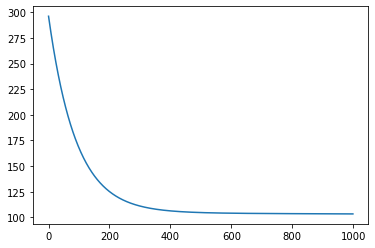

In [9]:
plt.plot([i for i in range(epochs)], Losses)
plt.savefig('loss.png')

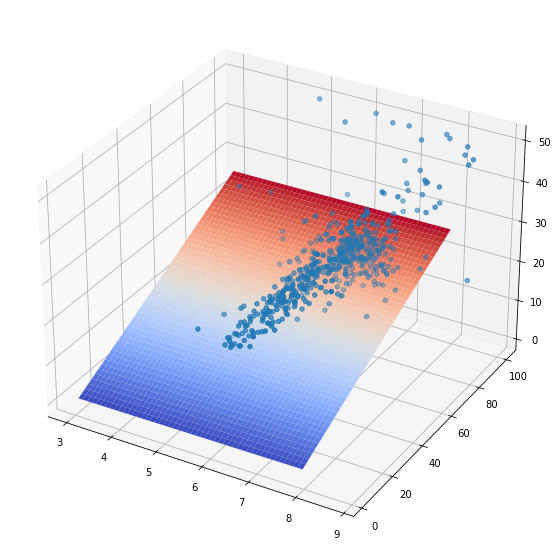

In [10]:
MINx0, MAXx0 = int(np.min(x0)), int(np.max(x0))
MINx1,MAXx1 = int(np.min(x1)), int(np.max(x1))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_figheight(10)
fig.set_figwidth(30)
ax.scatter(x0, x1, y)

x_range = np.arange(MINx0, MAXx0, 0.1)
y_range = np.arange(MINx1, MAXx1, 0.1)
X, Y = np.meshgrid(x_range, y_range)

Z = a*X + b*Y + c
ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
plt.show()